# <center> Proyecto Extractos Colcafé

#### Modelo de temperatura para cava grande

In [2]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Modelo Anterior

# Datos Experimentales
archivo = "Datos_Temperatura.xlsx"
time      = pd.read_excel(archivo, sheet_name='Sensor ext1')['Tiempo [h]'] * 3600
temp_real = pd.read_excel(archivo, sheet_name='Sensor ext1')['Temp [C]']

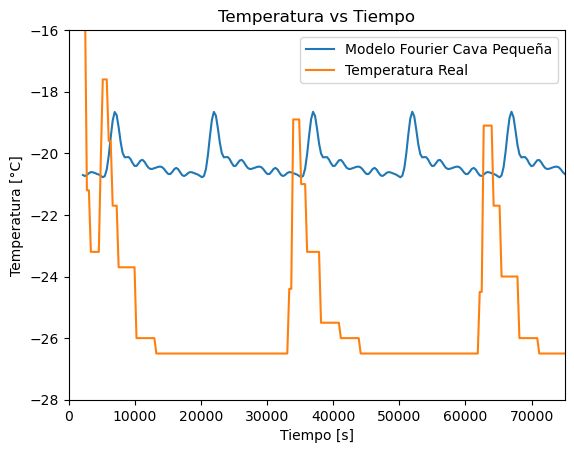

In [4]:
#Parametros Serie de Fourier para Temperatura Cava Pequeña (Nathaly)
a0 = -20.31
a1 = -0.4273
b1 = -0.1188
a2 = 0.3271
b2 = -0.04853
a3 = -0.2548
b3 = 0.1279
a4 = 0.1724
b4 = -0.1499
a5 = -0.1052
b5 = 0.1352
a6 = -0.04371
b6 = -0.1293
a7 = -0.01711
b7 = 0.09
a8 = -0.0001622
b8 = -0.06818
w1 = 0.0004193

temp_model =  (a0 + 
             (a1 * np.cos(time*w1))   + (b1*np.sin(time*w1))   + (a2*np.cos(2*time*w1)) + (b2*np.sin(2*time*w1))  +
             (a3 * np.cos(3*time*w1)) + (b3*np.sin(3*time*w1)) + (a4*np.cos(4*time*w1)) + (b4*np.sin(4*time*w1))  +
             (a5 * np.cos(5*time*w1)) + (b5*np.sin(5*time*w1)) + (a6*np.cos(6*time*w1)) + (b6*np.sin(6*time*w1))  +
             (a7 * np.cos(7*time*w1)) + (b7*np.sin(7*time*w1)) + (a8*np.cos(8*time*w1)) + (b8*np.sin(8*time*w1)))

plt.figure()
plt.plot(time, temp_model, label='Modelo Fourier Cava Pequeña')
plt.plot(time, temp_real,  label='Temperatura Real')
plt.title('Temperatura vs Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [°C]')
plt.xlim(0,75000)
plt.ylim(-28,-16)
plt.legend()
plt.show()

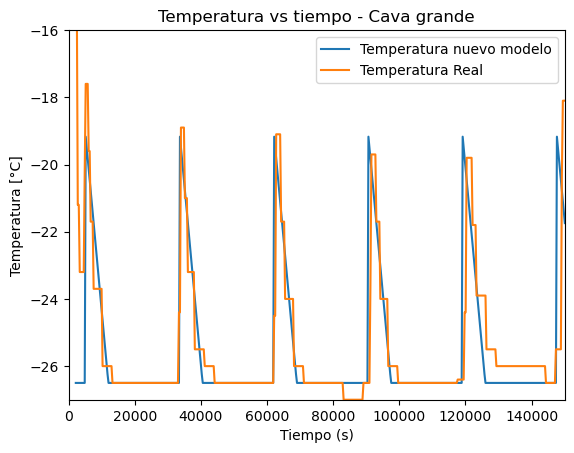

In [5]:
def fun_cava(t):
    descenso = 7000
    constante = 21500
    ciclo = descenso + constante
    
    # Modular el tiempo para repetir el ciclo
    tiempo_mod = t % ciclo
    
    # Primera parte: descenso lineal desde -19 hasta -26.5 en 5000 segundos
    if tiempo_mod <= descenso:
        pendiente = (26.5 - 19) / descenso  # Pendiente del tramo descendente
        return -19 - pendiente * tiempo_mod
    
    # Segunda parte: constante en -26.5 durante 24000 segundos
    else:
        return -26.5

T_cava = [fun_cava(t - 5000) for t in time] # Ese t-5000 es para desplazar la grafica en el eje x y que se acomode con los datos reales de la cava

# Graficar
plt.figure()
plt.plot(time, T_cava, label = 'Temperatura nuevo modelo')
plt.plot(time, temp_real,  label='Temperatura Real')
plt.title("Temperatura vs tiempo - Cava grande")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura [°C]")
plt.xlim([0,150000])
plt.ylim([-27,-16])
plt.legend()
plt.show()


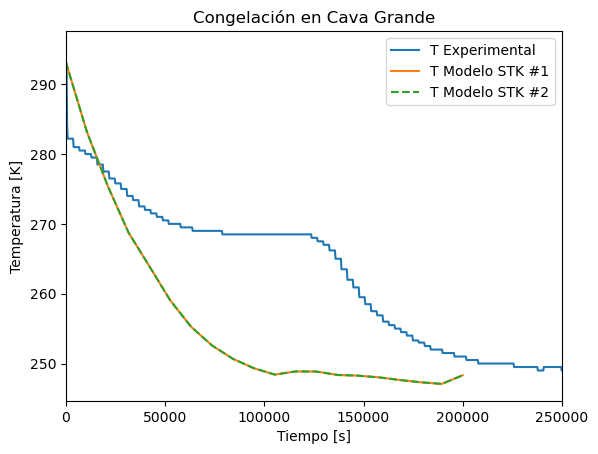

In [12]:
path_0 = "C:/Users/Camilo/Documents/Modelamiento Matematico/Colcafe/Colcafe_Camilo/Datos Cava/Datos_Temperatura.xlsx"

path_1 = "C:/Users/Camilo/Documents/Modelamiento Matematico/Colcafe/Colcafe_Camilo/Historico/Run_2/Perfiles/perfil_centro.csv"
path_2 = "C:/Users/Camilo/Documents/Modelamiento Matematico/Colcafe/Colcafe_Camilo/Historico/Run_2/Perfiles/perfil_centro.csv"

time      = pd.read_excel(path_0, sheet_name='Extracto')['Tiempo [h]'] * 3600
temp_real_extracto = pd.read_excel(archivo, sheet_name='Extracto')['Temp [C]']

run_1 = pd.read_csv(path_1, delimiter=';')
time_model_1 = run_1['Tiempo'].str.replace(',', '.').astype(float)
temp_model_1 = run_1['Temperatura'].str.replace(',', '.').astype(float)

run_2 = pd.read_csv(path_2, delimiter=';')
time_model_2 = run_2['Tiempo'].str.replace(',', '.').astype(float)
temp_model_2 = run_2['Temperatura'].str.replace(',', '.').astype(float)

plt.figure()
plt.title('Congelación en Cava Grande')
plt.plot(time,temp_real_extracto+273, label='T Experimental')
plt.plot(time_model_1,temp_model_1,label='T Modelo STK #1')
plt.plot(time_model_2,temp_model_2, '--', label='T Modelo STK #2')
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [K]')
plt.xlim([0,250000])
plt.legend()
plt.show()
